In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import os

# 1. Find correlation between FWI and fire intensity

In [20]:
save_path = '../../climada_petals/data/wildfire/output/'
merged_gdf = gpd.read_file(os.path.join(save_path, 'merged_gdf'))
merged_gdf


,latitude_left,longitude_left,brightness,satellite,instrument,confidence,bright_t31,frp,daynight,values,surface,latitude_right,longitude_right,fwi,date,geometry
0,58.4495,-0.2430,315.1,Terra,MODIS,63,280.1,29.1,D,41204,0.0,58.313789,0.000000,NaN,2000-11-02,POINT (-0.24300 58.44950)
1,58.1699,-1.3867,309.1,Terra,MODIS,64,274.9,25.3,N,41924,0.0,58.032759,0.000000,NaN,2000-11-03,POINT (-1.38670 58.16990)
2,57.0274,1.9606,313.3,Terra,MODIS,57,278.1,28.3,D,44808,0.0,56.908638,2.000000,NaN,2000-11-04,POINT (1.96060 57.02740)
3,58.1740,-1.3698,316.7,Terra,MODIS,63,281.2,21.2,D,41204,0.0,58.313789,0.000000,NaN,2000-11-04,POINT (-1.36980 58.17400)
4,51.5788,-2.9113,300.9,Terra,MODIS,43,283.9,9.5,D,59609,0.0,51.569065,0.000000,0.351562,2000-11-04,POINT (-2.91130 51.57880)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21241,49.4819,0.2440,300.2,Aqua,MODIS,19,267.3,23.1,N,65658,0.0,49.601853,0.416667,0.023438,2023-01-18,POINT (0.24400 49.48190)
21242,51.5660,-3.7676,302.2,Terra,MODIS,39,277.5,9.6,D,59609,0.0,51.569065,0.000000,0.138672,2023-01-19,POINT (-3.76760 51.56600)
21243,53.5733,-0.5941,300.3,Aqua,MODIS,25,272.1,9.9,N,53925,0.0,53.536276,0.000000,0.984375,2023-01-20,POINT (-0.59410 53.57330)
21244,51.5744,-3.7765,300.5,Terra,MODIS,28,274.8,7.4,D,59609,0.0,51.569065,0.000000,0.261719,2023-01-26,POINT (-3.77650 51.57440)


In [21]:
print(merged_gdf.shape)

(21246, 16)


In [22]:
# Drop FWI and brightness rows with missing values
filtered_df = merged_gdf.dropna(subset=['fwi', 'brightness'])
filtered_df

,latitude_left,longitude_left,brightness,satellite,instrument,confidence,bright_t31,frp,daynight,values,surface,latitude_right,longitude_right,fwi,date,geometry
4,51.5788,-2.9113,300.9,Terra,MODIS,43,283.9,9.5,D,59609,0.0,51.569065,0.000000,0.351562,2000-11-04,POINT (-2.91130 51.57880)
5,53.5644,-0.5972,305.5,Terra,MODIS,58,279.2,10.2,D,53925,0.0,53.536276,0.000000,0.417969,2000-11-10,POINT (-0.59720 53.56440)
8,53.4509,-1.3188,306.2,Terra,MODIS,63,277.0,13.7,D,53925,0.0,53.536276,0.000000,0.640625,2000-11-13,POINT (-1.31880 53.45090)
9,51.5743,-3.7736,308.6,Terra,MODIS,51,281.5,13.5,D,59609,0.0,51.569065,0.000000,0.136719,2000-11-13,POINT (-3.77360 51.57430)
10,51.5687,-3.7656,304.4,Terra,MODIS,0,282.1,11.3,D,59609,0.0,51.569065,0.000000,0.136719,2000-11-13,POINT (-3.76560 51.56870)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21238,53.2741,-2.8414,325.4,Terra,MODIS,100,268.9,33.4,N,54725,0.0,53.255246,0.000000,0.113281,2023-01-08,POINT (-2.84140 53.27410)
21241,49.4819,0.2440,300.2,Aqua,MODIS,19,267.3,23.1,N,65658,0.0,49.601853,0.416667,0.023438,2023-01-18,POINT (0.24400 49.48190)
21242,51.5660,-3.7676,302.2,Terra,MODIS,39,277.5,9.6,D,59609,0.0,51.569065,0.000000,0.138672,2023-01-19,POINT (-3.76760 51.56600)
21243,53.5733,-0.5941,300.3,Aqua,MODIS,25,272.1,9.9,N,53925,0.0,53.536276,0.000000,0.984375,2023-01-20,POINT (-0.59410 53.57330)


# 1.1 Calculate Pearson correlation coefficient without normalization

In [6]:
# calculate pearson correlation coefficient
correlation = filtered_df['fwi'].corr(filtered_df['brightness'])
print(f"The correlation between FWI and brightness is: {correlation}")

The correlation between FWI and brightness is: 0.2504713078601903


In [8]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
filtered_df[['fwi', 'brightness']].corr(method=histogram_intersection)

,fwi,brightness
fwi,1.0,114508.1
brightness,114508.1,1.0


<Axes: xlabel='fwi', ylabel='brightness'>

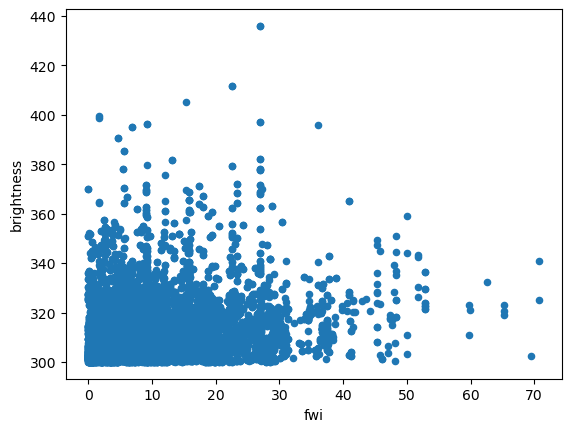

In [12]:
filtered_df[['fwi', 'brightness']].plot.scatter(x='fwi', y='brightness')
# plot in log scale


Pearson correlation > 0.25 is considered a very strong association (Akoglu, 2018). The correlation should be higher if geolocation is considered (calculate correlation separately for different areas).

# 1.2 Calculate Pearson correlation coefficient with normalization

In [17]:
# Normalize the data using Min-Max Scaling
# x_norm = (x - x_min) / (x_max - x_min)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
filtered_df[['fwi', 'brightness']] = scaler.fit_transform(filtered_df[['fwi', 'brightness']])

C:\Users\zhong\.conda\envs\climada_env\lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
# Calculate the correlation matrix
correlation_matrix = filtered_df[['fwi', 'brightness']].corr()

# Get the correlation between 'fwi' and 'brightness'
correlation_fwi_brightness = correlation_matrix.loc['fwi', 'brightness']

# Display the correlation
print(f"Correlation between 'fwi' and 'brightness': {correlation_fwi_brightness}")
print(correlation_matrix)

Correlation between 'fwi' and 'brightness': 0.2504713078601907
                 fwi  brightness
fwi         1.000000    0.250471
brightness  0.250471    1.000000


# 2. Find relationship between FWI and fire intensity

# 2.1 Link FWI and brightness using multiple Functions

In Step 1, we will explore multiple functional relationships between fwi and brightness to determine the best representation. We can try linear, polynomial, logarithmic, and exponential functions. Then, we will evaluate the goodness of fit for each function using metrics like R-squared.

1. Linear Function: y = a * x + b
2. Polynomial Function (degree 2): y = a * x^2 + b * x + c
3. Polynomial Function (degree 3): y = a * x^3 + b * x^2 + c * x + d
4. Logarithmic Function: y = a * log(x) + b
5. Exponential Function: y = a * exp(b * x)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

# Define functions
def linear(x, a, b):
    return a * x + b

def polynomial2(x, a, b, c):
    return a * x**2 + b * x + c

def polynomial3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def logarithmic(x, a, b):
    return a * np.log(x) + b

def exponential(x, a, b):
    return a * np.exp(b * x)

# Prepare data
x = filtered_df['fwi']
y = filtered_df['brightness']

# Fit functions and calculate R-squared
def fit_and_evaluate(func, x, y):
    popt, pcov = curve_fit(func, x, y, maxfev=10000)
    y_pred = func(x, *popt)
    r2 = r2_score(y, y_pred)
    return popt, r2

# Linear
popt_linear, r2_linear = fit_and_evaluate(linear, x, y)

# Polynomial degree 2
popt_poly2, r2_poly2 = fit_and_evaluate(polynomial2, x, y)

# Polynomial degree 3
popt_poly3, r2_poly3 = fit_and_evaluate(polynomial3, x, y)

# Logarithmic
popt_log, r2_log = fit_and_evaluate(logarithmic, x, y)

# Exponential
popt_exp, r2_exp = fit_and_evaluate(exponential, x, y)

# Collect results
results = {
    'Linear': r2_linear,
    'Polynomial (degree 2)': r2_poly2,
    'Polynomial (degree 3)': r2_poly3,
    'Logarithmic': r2_log,
    'Exponential': r2_exp
}

In [27]:
best_function = max(results, key=results.get)
best_r2 = results[best_function]

# Print results
print(f"Best function: {best_function} with R-squared: {best_r2}")
print("All R-squared values:")

Best function: Polynomial (degree 3) with R-squared: 0.06414247453364574
All R-squared values:


In [30]:
for func, r2 in results.items():
    print(f"{func}: {r2}")

Linear: 0.06273587606119435
Polynomial (degree 2): 0.0640615835427466
Polynomial (degree 3): 0.06414247453364574
Logarithmic: 0.025626026516292866
Exponential: -576684974333301.1


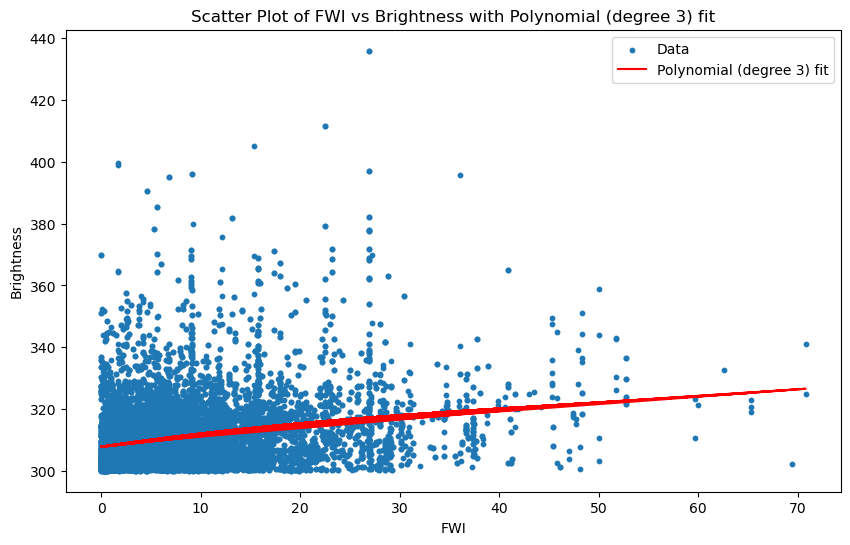

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, label='Data')

# Plot best fit line
if best_function == 'Linear':
    plt.plot(x, linear(x, *popt_linear), color='red', label='Linear fit')
elif best_function == 'Polynomial (degree 2)':
    plt.plot(x, polynomial2(x, *popt_poly2), color='red', label='Polynomial (degree 2) fit')
elif best_function == 'Polynomial (degree 3)':
    plt.plot(x, polynomial3(x, *popt_poly3), color='red', label='Polynomial (degree 3) fit')
elif best_function == 'Logarithmic':
    plt.plot(x, logarithmic(x, *popt_log), color='red', label='Logarithmic fit')
elif best_function == 'Exponential':
    plt.plot(x, exponential(x, *popt_exp), color='red', label='Exponential fit')

plt.xlabel('FWI')
plt.ylabel('Brightness')
plt.title(f'Scatter Plot of FWI vs Brightness with {best_function} fit')
plt.legend()
plt.show()




# 2.2 Use Statistical Methods

In [19]:
# Calculate the correlation coefficient
correlation = filtered_df['fwi'].corr(filtered_df['brightness'])
print(f"Correlation coefficient between 'fwi' and 'brightness': {correlation}")

In [32]:
import statsmodels.api as sm
# Perform a regression analysis using statsmodels
X = sm.add_constant(filtered_df['fwi'])  # Add a constant term for the intercept
y = filtered_df['brightness']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the regression analysis summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             brightness   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     928.7
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          1.68e-197
Time:                        18:56:31   Log-Likelihood:                -52667.
No. Observations:               13877   AIC:                         1.053e+05
Df Residuals:                   13875   BIC:                         1.054e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.2260      0.130   2372.021      0.0

In [33]:
# Print the R-squared value explicitly
print(f"R-squared: {model.rsquared}")

R-squared: 0.06273587606119424


R-squared: 0.063 - This indicates that approximately 6.3% of the variability in brightness can be explained by fwi.

Prob (F-statistic): 1.68e-197 - This is the p-value for the F-statistic. A value close to zero (much less than 0.05) indicates that the model is statistically significant.


The regression model shows that there is a statistically significant relationship between fwi and brightness, with both the intercept and the slope being highly significant (p < 0.05). However, the R-squared value of 0.063 indicates that fwi explains only about 6.3% of the variability in brightness, suggesting that other factors may also influence brightness. 

# 2.3 Use Machine Learning Methods

In [19]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# 
# # Split the data into training and testing sets
# X = filtered_df[['fwi']]
# y = filtered_df['brightness']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 
# # Initialize and train the model
# model = LinearRegression()
# model.fit(X_train, y_train)
# 
# # Make predictions
# y_pred = model.predict(X_test)
# 
# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# 
# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")


# 3. Include WFI into overall (global) propagation probability (self.ProbaParams.prop_proba=0.21)

A simple thought:
Step1: Calculate the average FWI
Step2: For each centriod, calculate the percentage deviation of FWI from the average FWI
Step3: Use the percentage deviation * 0.21 to adjust the overall propagation probability
Step4: Consider geographical location using kNN or other methods...